# Meteoroids planet fall - data synthesis
Data synthesis as the assignment project for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 18-11-2019

This Notebook should be read in conjunction with the corresponding README.md file at the project [repository](https://github.com/andkoc001/data_synthesis.git) at GitHub.

___

## Introduction

### The phenomenon

Meteorite planet fall is a commonplace phenomenon in nature. It occurs when certain astronomical objects (meteorites) hit a planet (or similar object). It is believed it is a universal occurrence in planetary systems, especially intensive during its formation. 

![Impact craters on Mimas' surface (Saturn’s moon)](https://upload.wikimedia.org/wikipedia/commons/d/da/Mimas_moon.jpg)


![Localised impact craters field?](https://d1ix0byejyn2u7.cloudfront.net/drive/images/uploads/headers/ws_cropper/1_0x0_1410x520_0x520_potholes.jpg =20x)

There is a large number of factors affecting the phenomenon. Many of them affect each other, so that the circumstances may appear random and of chaotic nature.

### Problem statement and project objectives

Purpose: To generate (synthesise) a dataset that simulate meteorids fall on a planet.

Project objectives:

### Simplifications and assumptions
Note: this project is a _simplified model_ in terms of factors considered, relationship between them and terminology describing the phenomenon.

~~The scenario and data are both fictional, invented solely for the purpose of this project.~~ The data presented in the notebook is real and true. However, as it illustrates the situation in an undiscovered solar system in a galaxy far, far away, and is hard to prove it, please assume the data presented here is fictional.

The entire being simulated in the Notebook scenario, including the generated data, are simplified models with numerous assumptions and various levels of abstraction.
* ...
* ...

___
## Data categories and types

The following are envisaged data categories and types

* `Year` - Year of observation, integer from 1 to n
* `Entry`- No of atmosphere entry, integer following the Poisson distribution with lambda $lambda = 0.25$ (to be verified)
* `Impact` - No of surface impacts, binomial distribution as a function of size and angle of entry $f(size, angle)$
* Size of a meteor, exponential distribution (few large, many small)
* Density of a meteor, normal distribution
* Veleocity of a meteor hitting the surface, normal distribution ????
* Angle of entry, random ditribution in range 0-90
* Total crater area, calculated as a function of size, density, veleociy, angle and additional noise


I have chosen not to define seeds for random methods. That means each time the Notebook and particular cells are run, results will (most likely) differ.

## Importing Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Generating the data

In [2]:
# creation of empty data (just headings)
data = pd.DataFrame(columns = ["Year", "Entry", "Impact", "Mass", "Velocity", "Crater", "Class"]) 

# data.head() # for testing

### Observation period and intervals

Observations are recorded in one year intervals over a period of 100 local years (for the planet in question). This will be assigned to variable `year`.

In [3]:
year = np.arange(1, 1001) # number of observations (= the second number - the first number)

In [4]:
# assigning year values to the data array, other columns with empty values (NaN - not a number)
data["Year"] = year
# data.head(2)

### Atmosphere entry

Number of significant (that means those being recorded) meteors' entries to the atmosphere of the planet, represented by variable `atm_entry`, in my model is considered unpredictable event and of a chaotic nature (significant random noise). It is assumed that in a given year there may be _none_ to _a very large number_ of entries, with a certain mean number. This will be represented by a **Poisson distribution**. The reason for choosing this distribution is to capture the fact of lesser probability of a larger number of meteors entering the planet's atmosphere.

The lambda value assigned randomly again, to strengthen the effect of the chaotic nature of the phenomenon. (More about randomness of the lambda values - why and how).

In [5]:
# defines lambda value for the poisson distribution
atm_entry_lambda = np.random.random() + np.random.randint(2, 4) # expected mean value - it gives a general shape of the distribution
print(atm_entry_lambda)

# defines noise used to modify the results
atm_entry_noise = np.random.randint(-1500, -500) # extra random noise - expands the range of possible results and adds randomness and increases the standard deviation
print(atm_entry_noise)

3.242738467936668
-1395


min:	 0
mean:	 29.879
max:	 123
std div: 22.42303188687917


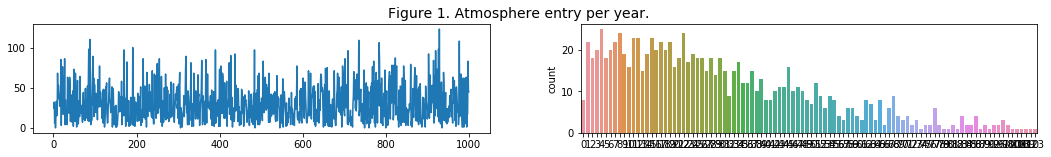

List in sequence of years:
 [ 25  32   6  23   0  16  33  15  18  68  36  53  44  40  27  38  33  85
   3  52  29  76  17  17  65  22  86   4  35  11  18  24   4  63  58  26
  19  18  63  55   8  30  17  41   7  16  46   2  73  30  34   8  68  27
  12   1  32  59   5   5  17  34  14  64  28  18  28  23  14   7  25  44
  11  34  15   9  49  20  31  36  12  52   9  60  98   8  11 110  65   4
  34   9  32  59  89  28  62  14  54  33  29  19  43  35  26  10  60  26
  34  28  77  26  45  43  28  33  13  11  47   6  48  43   1  12  17  51
  45  56  17   6   7  28  32  54  62  39  29  19  31  30  51   1  25  49
  29   4  26  21   7   1  28   1   8   4  14  22  45  41  20  24  21  39
  20  58   4  21  37  39  15  97  17  37  17   2   9  50  82  28   8  16
  34   2   8  13   3  38  21  37  22   4 100   5   3  18  38   2  21  32
  31  18  27   8  43   9  38   9  19  39  33  51   3  22  11   7  25  86
  37  13  30  52  11  11  33   1  69  29  14  44  38  21  54  21  45  29
  19  14  13  71  12  1

In [6]:

# the algorithm with nested random variables - poisson distribution
# the intention is to have low mean and high std dev. values - verry erratic and chaotic phenomenon
# consulted reference: https://stackoverflow.com/a/35730154
atm_entry = abs(np.random.poisson(abs(atm_entry_lambda + (atm_entry_noise)), len(year)) + atm_entry_noise) # higher probability of occuring fewer meteors entry in a year; only non-negative values

# description of the generated data
#print("atm_entry_lambda:\t", atm_entry_lambda)
#print("atm_entry_noise:\t", atm_entry_noise)
print("min:\t", atm_entry.min())
print("mean:\t", atm_entry.mean())
print("max:\t", atm_entry.max())
print("std div:", atm_entry.std())

### plotting - 
fig, ax = plt.subplots(ncols=2, figsize=(18, 2))
plt.suptitle("Figure 1. Atmosphere entry per year.", y=1.0, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=None)

# left hand plot - number of entries in each year of observation
sns.lineplot(x=year, y=atm_entry, ax=ax[0]) 

# right hand plot - how many the same number of entries occured
sns.countplot(x=atm_entry, ax=ax[1])   

plt.show()
print("List in sequence of years:\n", atm_entry)
print("\nOccurances:\n", np.unique(set(atm_entry)))

# https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
unique_elements, counts_elements = np.unique(atm_entry, return_counts=True)
print("\nFrequency of unique values of the said array, sorted:")
print(np.asarray((unique_elements, counts_elements)))

##### Adding `Entry` values to the dataset.

In [7]:
data["Entry"] = atm_entry # abs(np.random.poisson(abs(atm_entry_lambda + abs(atm_entry_noise)), len(year)) + atm_entry_noise)

### Surface impact

Number of meteors impacts into the planet surface, that is the meteors that entered the atmosphere of the planet and penetrated it without being completely burned out in the transit. 
The variable is represented in my model by variable `Impact` which is a result of **binomial distribution** with arbitrarily given probability of success. This is simplification, as a lot of factors are neglected here that would have an effect in real situation (e.g. size, density, composition, velocity, angle of entry, atmosphere properties and so on).

This part is based on Ian Mcloughlin's [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/coin-flip.ipynb) on coin flip.

In [8]:
# assign probability of meteoroids passing through the atmosfere and hitting the surface
passing_prob = 0.01*np.random.randint(5, 21) # range from 0.05 to 0.2
passing_prob

0.15

In [9]:
# filtering the meteoroids - testing how many in each year have passed through 

# for each year
for index, row in data.iterrows(): # adapted from https://stackoverflow.com/a/16476974
    print("\n")
    print("Year:", index+1) #, "\tNumber of meteo:\t", row["Entry"])

    sum = 0 # counting up the instances of successfully passing in a given year
    
    for i in range(data.iat[index, 1]): # data.iat[-1, 1] returns value of a cell
       
        # testing for a single instance (Number of tests, probability of a penetration, number of times to do this);
        passed = np.random.binomial(1, passing_prob, 1) # adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/coin-flip.ipynb
        # print("Meteo no.", i+1, ": ", passed)
        sum = int(sum + passed)
    
    print("Number of meteo passing the atm / total number:\t", sum, "/", row["Entry"])
    
    if row["Entry"] != 0: # check if there was any meteo hittint the atmosphere in a given year
        ratio_passing = sum/row["Entry"]
        
    else:
        ratio_passing = 0  
    #print("\t\t\t  Ratio:\t", ratio_passing)
    
    
    # assign number of surface impacts to the main dataset
    data.iat[index, 2] = sum 
    #print(data["Impact"])



Year: 1
Number of meteo passing the atm / total number:	 8 / 25


Year: 2
Number of meteo passing the atm / total number:	 1 / 32


Year: 3
Number of meteo passing the atm / total number:	 2 / 6


Year: 4
Number of meteo passing the atm / total number:	 4 / 23


Year: 5
Number of meteo passing the atm / total number:	 0 / 0


Year: 6
Number of meteo passing the atm / total number:	 2 / 16


Year: 7
Number of meteo passing the atm / total number:	 5 / 33


Year: 8
Number of meteo passing the atm / total number:	 6 / 15


Year: 9
Number of meteo passing the atm / total number:	 3 / 18


Year: 10
Number of meteo passing the atm / total number:	 10 / 68


Year: 11
Number of meteo passing the atm / total number:	 4 / 36


Year: 12
Number of meteo passing the atm / total number:	 11 / 53


Year: 13
Number of meteo passing the atm / total number:	 5 / 44


Year: 14
Number of meteo passing the atm / total number:	 5 / 40


Year: 15
Number of meteo passing the atm / total number:	 3 / 27


Ye

### Parameters of each meteor

The mass and velocity of **every** meteors hitting the planet surface in given year is generated in the model - other are not considered in the dataset.

The mass and velocity are stored in a separate subset of data for each year (3rd dimension of the original dataset?).

#### Mass of the meteoroids

The mass of the meteor is distributed according to pareto principle, that is many small meteors and few large. The variable is generated with the help of `np.random.pareto()` function.

Assigning pareto distibution parameters

In [10]:
# adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.pareto.html

# parameters for pareto dirstribution: pareto_a - shape of the distribution, pareto_m - mode of the distribution

mass_pareto_a, mass_pareto_m = 1.0, 1000.0  # shape and mode - picked arbitrarily to resemble reality as much as the author could think

# shape of the pareto distribution determines the how much the number of small meteors would dominate over the large ones; greater the shape value, the more small samples
# mode in the pareto distribution tells the magnitude (or scale) of the outcome (the size of the metors); the larger the mode, the larger the scale of the meteors

In [11]:
# splicing - getting the number of meteors entering the atmosphere in a given year
for i in data["Year"]:
    
    number_meteors = data.loc[i-1]["Impact"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    print("In year", i, "the number of meteors passing the atmosphere was:\t", number_meteors)
   
    if number_meteors != 0:  # only those that hit the planet are considered
        
        # genertating mass of each meteoroid
        mass_meteo = np.round((0.01*(np.random.pareto(mass_pareto_a, number_meteors) + 1) * mass_pareto_m) + 0.01*np.random.randint(-1000, 10), 0) # random mass for each meteoroid hitting the surface
        
        # recording the masses in the dataset table
        data.at[i-1, "Mass"] = mass_meteo
        
        print("Their mass was as follows:", data.at[i-1, "Mass"], "\n")
        #print(data)
        
    else:
        pass 

In year 1 the number of meteors passing the atmosphere was:	 8
Their mass was as follows: [14. 11. 18. 15. 62. 22. 33.  6.] 

In year 2 the number of meteors passing the atmosphere was:	 1
Their mass was as follows: [12.] 

In year 3 the number of meteors passing the atmosphere was:	 2
Their mass was as follows: [20.  2.] 

In year 4 the number of meteors passing the atmosphere was:	 4
Their mass was as follows: [   7. 2118.    9.   10.] 

In year 5 the number of meteors passing the atmosphere was:	 0
In year 6 the number of meteors passing the atmosphere was:	 2
Their mass was as follows: [8.7348e+04 7.0000e+00] 

In year 7 the number of meteors passing the atmosphere was:	 5
Their mass was as follows: [ 12. 193.  34. 661.  21.] 

In year 8 the number of meteors passing the atmosphere was:	 6
Their mass was as follows: [ 53. 122.  18.  36.  47.  11.] 

In year 9 the number of meteors passing the atmosphere was:	 3
Their mass was as follows: [ 6. 25. 82.] 

In year 10 the number of met

#### Velocity of the meteoroids

The velocity of the meteor is distributed according to pareto principle, that is many small meteors and few large. The variable is generated with the help of `np.random.pareto()` function.

Assigning pareto distibution parameters

In [12]:
# adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.pareto.html

# parameters for pareto dirstribution: pareto_a - shape of the distribution, pareto_m - mode of the distribution

velo_pareto_a, velo_pareto_m = 1.4, 5000.0  # shape and mode - picked arbitrarily to resemble reality as much as the author could think

# shape of the pareto distribution determines the how much the number of slow meteoroids would dominate over the fast ones; greater the shape value, the more slow samples
# mode in the pareto distribution tells the magnitude (or scale) of the outcome (the velocity of the metoroids); the larger the mode, the larger the velocity of the meteors

In [13]:
# splicing - getting the number of meteors entering the atmosphere in a given year
for i in data["Year"]:
    
    number_meteors = data.loc[i-1]["Impact"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    print("In year", i, "the number of meteors passing the atmosphere was:\t", number_meteors)
   
    if number_meteors != 0:  # only those that hit the planet are considered
        
        # generating velocity value for each meteo
        velo = np.round((0.01*(np.random.pareto(velo_pareto_a, number_meteors) + 1) * velo_pareto_m) + 0.01*np.random.randint(-1000, 10), 0) # random mass for each meteoroid hitting the surface
        
        # assigning the velo values to the dataset
        data.at[i-1, "Velocity"] = velo
        print("Their mass was as follows:", data.at[i-1, "Velocity"], "\n")
        #print(data)
        
    else:
        print()
        pass

In year 1 the number of meteors passing the atmosphere was:	 8
Their mass was as follows: [ 58. 122. 119. 201. 212. 125.  72.  72.] 

In year 2 the number of meteors passing the atmosphere was:	 1
Their mass was as follows: [77.] 

In year 3 the number of meteors passing the atmosphere was:	 2
Their mass was as follows: [ 86. 137.] 

In year 4 the number of meteors passing the atmosphere was:	 4
Their mass was as follows: [ 55.  54.  69. 618.] 

In year 5 the number of meteors passing the atmosphere was:	 0

In year 6 the number of meteors passing the atmosphere was:	 2
Their mass was as follows: [ 76. 156.] 

In year 7 the number of meteors passing the atmosphere was:	 5
Their mass was as follows: [ 49.  99.  53.  63. 109.] 

In year 8 the number of meteors passing the atmosphere was:	 6
Their mass was as follows: [131.  94.  83.  65. 118.  50.] 

In year 9 the number of meteors passing the atmosphere was:	 3
Their mass was as follows: [ 72. 270. 266.] 

In year 10 the number of meteo

#### Picking the highest energy meteoroid 

In [14]:
# Calculation of the meteoroids energy
for i in data["Year"]:
    
    if data.loc[i-1]["Impact"] != 0:
        #print(data.loc[i-1]["Mass"], "*", data.loc[i-1]["Velocity"], "=", (data.loc[i-1]["Mass"] * data.loc[i-1]["Velocity"]))
        
        # calculation energy for each meteroid hitting the planet
        energy_calcs = np.round(.001 * data.loc[i-1]["Mass"] * data.loc[i-1]["Velocity"], 1)
        
        # recording only the highest energy metoroid in the dataset
        data.at[i-1, "Crater"] = max(energy_calcs)
        
        
        #data.at[i-1, "Crater"] = max(np.round(.001 * data.loc[i-1]["Mass"] * data.loc[i-1]["Velocity"], 1)) # only max energy meteroid recorded
        #print(data.loc[i-1]["Crater"])
                
    else:
         pass
        
#print(data.loc[i-1]["Crater"])
    #for j in data["Year"]:
    
    #number_meteors = data.loc[i-1]["Impact"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    #print("In year", i, "the number of meteors passing the atmosphere was:\t", number_meteors, "\nTheir mass was as follows:")
   
    #if number_meteors != 0:
    #    data.at[i-1, "Velocity"] = np.round(((np.random.pareto(velo_pareto_a, number_meteors) + 1) * velo_pareto_m) + np.random.randint(-1000, 10), 0) # random mass for each meteoroid hitting the surface
    #    print(data.at[i-1, "Velocity"], "\n")
    #    #print(data)
    #else:
    #    data.at[i-1, "Velocity"] = 0   
data

,Year,Entry,Impact,Mass,Velocity,Crater,Class
0,1,25,8,"[14.0, 11.0, 18.0, 15.0, 62.0, 22.0, 33.0, 6.0]","[58.0, 122.0, 119.0, 201.0, 212.0, 125.0, 72.0...",13.1,NaN
1,2,32,1,[12.0],[77.0],0.9,NaN
2,3,6,2,"[20.0, 2.0]","[86.0, 137.0]",1.7,NaN
3,4,23,4,"[7.0, 2118.0, 9.0, 10.0]","[55.0, 54.0, 69.0, 618.0]",114.4,NaN
4,5,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
995,996,17,4,"[14.0, 5.0, 5.0, 15.0]","[50.0, 161.0, 184.0, 45.0]",0.9,NaN
996,997,17,4,"[38.0, 26.0, 25.0, 10.0]","[145.0, 55.0, 96.0, 118.0]",5.5,NaN
997,998,83,7,"[14.0, 12.0, 12.0, 11.0, 9.0, 128.0, 15.0]","[119.0, 63.0, 64.0, 84.0, 192.0, 110.0, 51.0]",14.1,NaN
998,999,46,9,"[16.0, 6.0, 15.0, 24.0, 21.0, 9.0, 7.0, 14.0, ...","[45.0, 73.0, 58.0, 53.0, 56.0, 58.0, 139.0, 61...",2.4,NaN


### Class of the highest energy meteoroid

In the solar system there are following classes of meteoroids:
* iron,
* stone,
* ice.

Each class has a certain probability of hitting the planet - see below.

In [15]:
# in the solar system occure the following classes of meteorids as well as their corresponding probability of occurance
classes, class_probability = ("iron", "stone", "ice"), (0.8, 0.15, 0.05) # tuple data types, so that the order matters

In [16]:
for i in data["Year"]:
    
    if data.loc[i-1]["Impact"] != 0: # on condition there was an impact in this year
        
        # assigning the class in given year
        data.at[i-1, "Class"] = np.random.choice(classes, p=class_probability)
        
    else:
         pass

In [17]:
data

,Year,Entry,Impact,Mass,Velocity,Crater,Class
0,1,25,8,"[14.0, 11.0, 18.0, 15.0, 62.0, 22.0, 33.0, 6.0]","[58.0, 122.0, 119.0, 201.0, 212.0, 125.0, 72.0...",13.1,iron
1,2,32,1,[12.0],[77.0],0.9,iron
2,3,6,2,"[20.0, 2.0]","[86.0, 137.0]",1.7,iron
3,4,23,4,"[7.0, 2118.0, 9.0, 10.0]","[55.0, 54.0, 69.0, 618.0]",114.4,iron
4,5,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
995,996,17,4,"[14.0, 5.0, 5.0, 15.0]","[50.0, 161.0, 184.0, 45.0]",0.9,iron
996,997,17,4,"[38.0, 26.0, 25.0, 10.0]","[145.0, 55.0, 96.0, 118.0]",5.5,stone
997,998,83,7,"[14.0, 12.0, 12.0, 11.0, 9.0, 128.0, 15.0]","[119.0, 63.0, 64.0, 84.0, 192.0, 110.0, 51.0]",14.1,iron
998,999,46,9,"[16.0, 6.0, 15.0, 24.0, 21.0, 9.0, 7.0, 14.0, ...","[45.0, 73.0, 58.0, 53.0, 56.0, 58.0, 139.0, 61...",2.4,iron


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Year        1000 non-null int64
Entry       1000 non-null int64
Impact      1000 non-null object
Mass        884 non-null object
Velocity    884 non-null object
Crater      884 non-null object
Class       884 non-null object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [23]:
data.describe()

,Year,Entry
count,1000.000000,1000.000000
mean,500.500000,29.879000
std,288.819436,22.434252
min,1.000000,0.000000
25%,250.750000,12.000000
50%,500.500000,25.000000
75%,750.250000,44.000000
max,1000.000000,123.000000


___
Andrzej Kocielski